# **Market Basket Analysis Project**

Welcome to the Market Basket Analysis Project! This project involves analyzing transactional data to uncover actionable business insights. Below is a structured roadmap of the project, designed to guide you through each step of the analysis.

---

## **Table of Contents**

1. [Data Understanding and Preparation](#data-understanding-and-preparation)
    - Dataset Overview
    - Data Cleaning
    - Data Transformation
    - Data Inspection
2. [Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda)
    - Transaction-Level Analysis
    - Customer-Level Analysis
    - Item-Level Analysis
    - Price Sensitivity Analysis
3. [Customer Segmentation](#customer-segmentation)
    - Spend-Based Segmentation
    - Frequency-Based Segmentation
    - Item Diversity Segmentation
4. [Frequent Pattern and Association Rule Analysis](#frequent-pattern-and-association-rule-analysis)
    - Frequent Itemset Mining
    - Association Rule Mining
    - Displaying Association Rules

---

## **1. Data Understanding and Preparation**

### **Dataset Overview**
- **Explanation**: This step provides an initial understanding of the dataset structure and its key elements. Knowing what the dataset contains ensures a clear direction for analysis.
- **Example**: Columns include `BillNo`, `Itemname`, `Quantity`, `Price`, and `CustomerID`.
- **Impact of Skipping**: Without this understanding, critical insights might be missed.

### **Data Cleaning**
- **Why It’s Necessary**:
    - Detect and handle missing values to prevent calculation errors.
    - Remove duplicates to avoid inflated metrics.
- **Example**: Removing duplicate `BillNo` entries ensures transaction data is accurate.
- **Impact of Skipping**:
    - Missing values in `Price` lead to incorrect revenue figures.
    - Duplicates distort item popularity and revenue metrics.

### **Data Transformation**
- **Explanation**: Transforming the data prepares it for meaningful analysis.
- **Example**: Adding a `Total Amount` column (`Quantity × Price`) enables transaction-level spending insights.
- **Impact of Skipping**: Without transformations, analyses like revenue contribution become difficult.

### **Data Inspection**
- **Explanation**: Before diving into analysis, it's important to inspect the dataset for basic statistics and null values to better understand its structure.
- **Example**: Checking summary statistics (`describe()`) and identifying missing data (`isnull().sum()`).
- **Impact of Skipping**: Without inspecting the data, unexpected issues (like missing or inconsistent data) could be overlooked.

---

## **2. Exploratory Data Analysis (EDA)**

### **Transaction-Level Analysis**
- **Explanation**: Provides insights into sales trends and transaction characteristics.
- **Example**: Visualizing the number of items per transaction to identify typical basket sizes.
- **Impact of Skipping**: Missed insights into transaction patterns and revenue drivers.

### **Customer-Level Analysis**
- **Explanation**: Helps understand customer spending and behavior.
- **Example**: Identifying top-spending customers aids in loyalty program design.
- **Impact of Skipping**: Overlooking high-value customers reduces business optimization opportunities.

### **Item-Level Analysis**
- **Explanation**: Identifies high-revenue or popular items.
- **Example**: Pareto analysis reveals the top 20% of items driving 80% of revenue.
- **Impact of Skipping**: Inefficient inventory decisions.

### **Price Sensitivity Analysis**
- **Explanation**: Examines how price influences purchase behavior.
- **Example**: Discovering that lower-priced items are purchased in bulk.
- **Impact of Skipping**: Missed opportunities for pricing strategy optimization.

---

## **3. Customer Segmentation**

### **Spend-Based Segmentation**
- **Explanation**: Groups customers by spending levels (e.g., High, Medium, Low spenders).
- **Example**: Identifying the top 20% of customers contributing the most revenue.
- **Impact of Skipping**: Missed chances to prioritize high-value customers.

### **Frequency-Based Segmentation**
- **Explanation**: Categorizes customers based on purchase frequency.
- **Example**: Segmenting into Frequent, Occasional, and One-time buyers.
- **Impact of Skipping**: Inefficient targeting for marketing efforts.

### **Item Diversity Segmentation**
- **Explanation**: Identifies customers based on their variety of purchases.
- **Example**: Diverse buyers vs. specialized buyers.
- **Impact of Skipping**: Overlooking niche customer preferences.

---

## **4. Frequent Pattern and Association Rule Analysis**

### **Frequent Itemset Mining**
- **Explanation**: Discovers common item combinations in transactions.
- **Example**: "Bread and Butter" frequently bought together.
- **Impact of Skipping**: Missed opportunities for bundling or promotions.

### **Association Rule Mining**
- **Explanation**: Generates actionable insights, e.g., "If A, then B".
- **Example**: "If Milk is bought, there’s a 70% chance Bread is bought."
- **Impact of Skipping**: Missed cross-selling opportunities.

### **Visualizing Association Rules**
- **Explanation**: Displays the top association rules based on support, confidence, and lift.
- **Impact of Skipping**: Display the most meaningful association rules to provide actionable insights for marketing.

---

This roadmap sets the stage for a comprehensive and practical analysis of the dataset, focusing on uncovering actionable insights. Each section will follow with code, outputs, and interpretations to demonstrate the process and findings effectively.

In [1]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
# 1.1 Dataset Overview
# Load the dataset (update the path if needed)
data = pd.read_csv("C:/Users/ayush/Documents/Projects/Market Basket Analysis/market_basket_dataset.csv")
print("Dataset loaded successfully.")
data.columns = [col.strip() for col in data.columns]  # Strip column names
print("Column names cleaned.")

# Ensure required columns are present
required_columns = ["BillNo", "Itemname", "Quantity", "Price", "CustomerID"]
missing_columns = [col for col in required_columns if col not in data.columns]
if missing_columns:
    raise ValueError(f"Dataset is missing required columns: {missing_columns}")
print("All required columns are present.")

Dataset loaded successfully.
Column names cleaned.
All required columns are present.


In [3]:
# 1.2 Data Cleaning
print("Checking for null values...")
null_counts = data.isnull().sum()
if null_counts.any():
    print(f"Null values detected:\n{null_counts[null_counts > 0]}")
    data.dropna(subset=["BillNo", "Itemname", "Quantity", "Price"], inplace=True)
    print("Null values removed.")
else:
    print("No null values present.")

data.drop_duplicates(inplace=True)
data = data[data["Quantity"] > 0]
data = data[data["Price"] > 0]
print("Data cleaning complete. Removed duplicates and filtered invalid values.")

Checking for null values...
No null values present.
Data cleaning complete. Removed duplicates and filtered invalid values.


In [4]:
# 1.3 Data Transformation
# Add 'TotalPrice' column for analysis
data['TotalPrice'] = data['Quantity'] * data['Price']
print("TotalPrice column added successfully.")
print("First 5 rows of TotalPrice:")
print(data[['BillNo', 'Itemname', 'Quantity', 'Price', 'TotalPrice']].head())

TotalPrice column added successfully.
First 5 rows of TotalPrice:
   BillNo  Itemname  Quantity  Price  TotalPrice
0    1000    Apples         5   8.30       41.50
1    1000    Butter         4   6.06       24.24
2    1000      Eggs         4   2.66       10.64
3    1000  Potatoes         4   8.10       32.40
4    1004   Oranges         2   7.26       14.52


In [5]:
# 1.4 Data Inspection
# Check for basic statistics and null values
print("\n===== Basic Statistics of the Data =====")
print(data.describe())  # Summary statistics

print("\n===== Null Values Check =====")
null_values = data.isnull().sum()
print(f"Total Null Values per Column:\n{null_values}")


===== Basic Statistics of the Data =====
            BillNo    Quantity       Price    CustomerID  TotalPrice
count   500.000000  500.000000  500.000000    500.000000  500.000000
mean   1247.442000    2.978000    5.617660  54229.800000   16.712340
std     144.483097    1.426038    2.572919  25672.122585   11.752269
min    1000.000000    1.000000    1.040000  10504.000000    1.330000
25%    1120.000000    2.000000    3.570000  32823.500000    7.342500
50%    1246.500000    3.000000    5.430000  53506.500000   13.545000
75%    1370.000000    4.000000    7.920000  76644.250000   24.352500
max    1497.000000    5.000000    9.940000  99162.000000   49.650000

===== Null Values Check =====
Total Null Values per Column:
BillNo        0
Itemname      0
Quantity      0
Price         0
CustomerID    0
TotalPrice    0
dtype: int64



Performing transaction-level analysis...


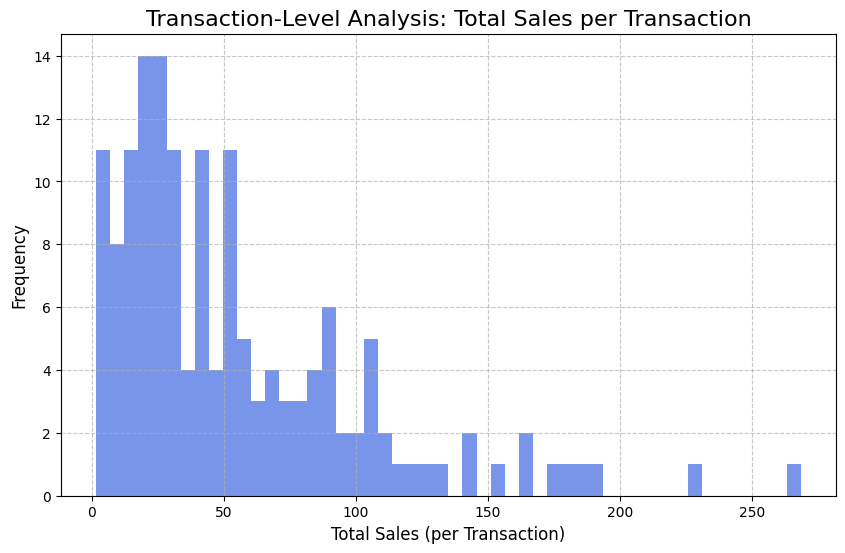

Transaction-level analysis completed.


In [6]:
# 2.1 Transaction-Level Analysis
print("\nPerforming transaction-level analysis...")

# Grouping by BillNo to get the total sales per transaction
transaction_data = data.groupby("BillNo").agg({"TotalPrice": "sum"}).reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(transaction_data['TotalPrice'], bins=50, color='royalblue', alpha=0.7)
plt.title('Transaction-Level Analysis: Total Sales per Transaction', fontsize=16)
plt.xlabel('Total Sales (per Transaction)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

print("Transaction-level analysis completed.")

Performing customer-level analysis...


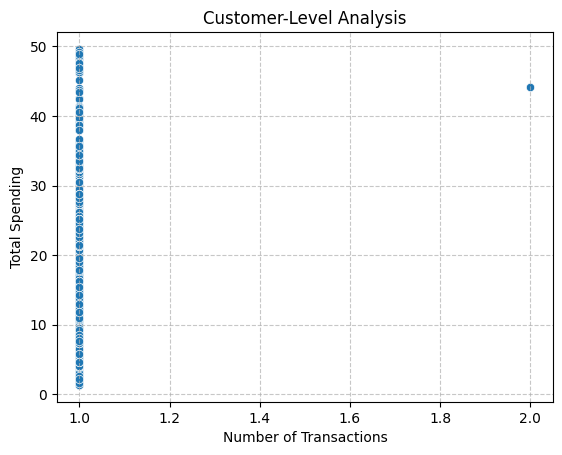

Customer-level analysis completed.


In [7]:
# 2.2 Customer-Level Analysis
print("Performing customer-level analysis...")
customer_data = data.groupby("CustomerID").agg({"TotalPrice": "sum", "BillNo": "nunique"}).reset_index()
customer_data.rename(columns={"BillNo": "TransactionCount"}, inplace=True)
sns.scatterplot(data=customer_data, x="TransactionCount", y="TotalPrice")
plt.title("Customer-Level Analysis")
plt.xlabel("Number of Transactions")
plt.ylabel("Total Spending")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
print("Customer-level analysis completed.")

In [8]:
# Group by CustomerID and calculate the average quantity and total spending
customer_behavior = data.groupby('CustomerID').agg(
    avg_quantity=('Quantity', 'mean'),
    total_spending=('TotalPrice', 'sum')
).reset_index()

# Display the resulting table
customer_behavior_table = customer_behavior.sort_values(by='total_spending', ascending=False)

# Show the table
print(customer_behavior_table)

     CustomerID  avg_quantity  total_spending
38        16469           5.0           49.65
316       65941           5.0           49.15
433       86740           5.0           48.95
135       34870           5.0           48.60
40        16613           5.0           48.20
..          ...           ...             ...
463       92263           1.0            1.54
289       60600           1.0            1.49
285       60252           1.0            1.41
389       78642           1.0            1.39
368       76128           1.0            1.33

[499 rows x 3 columns]


Performing item-level analysis...


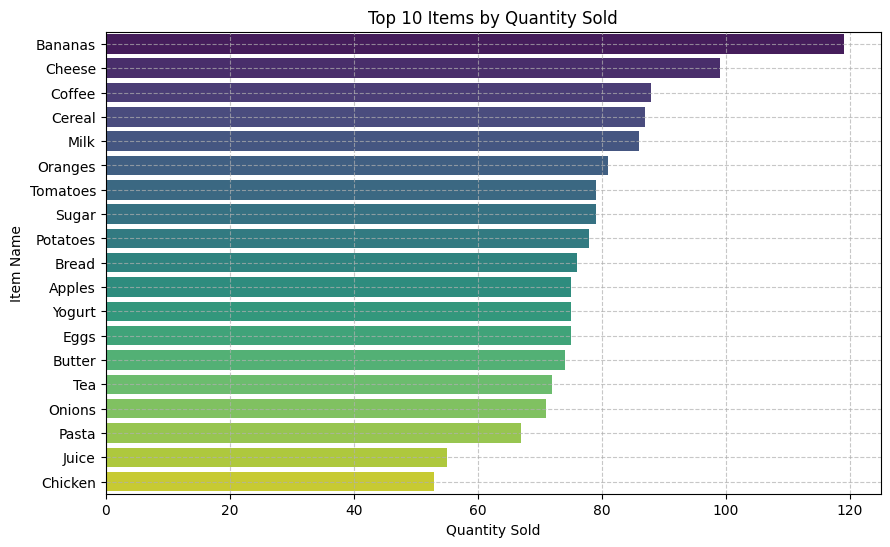

Item-level analysis completed.


In [9]:
# 2.3 Item-Level Analysis
print("Performing item-level analysis...")
item_data = data.groupby("Itemname").agg({"Quantity": "sum", "TotalPrice": "sum"}).reset_index()
item_data = item_data.sort_values(by="Quantity", ascending=False).head(20)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=item_data, x="Quantity", y="Itemname", hue="Itemname", palette="viridis", legend=False)

plt.title("Top 10 Items by Quantity Sold")
plt.xlabel("Quantity Sold")
plt.ylabel("Item Name")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
print("Item-level analysis completed.")

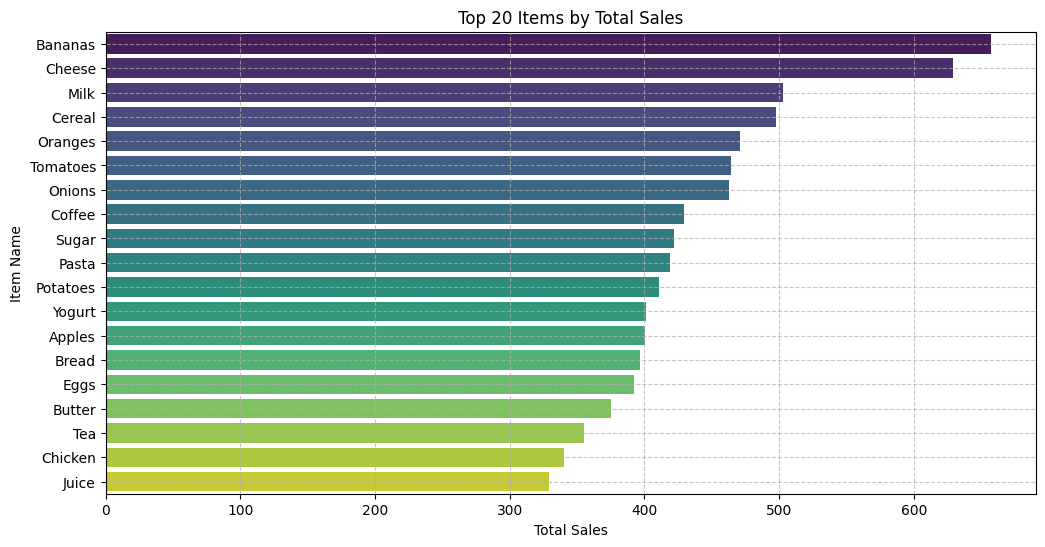

In [10]:
# Aggregate total sales by item using 'TotalPrice'
item_sales = data.groupby('Itemname')['TotalPrice'].sum().reset_index()

# Sort the items by total sales in descending order
item_sales_sorted = item_sales.sort_values('TotalPrice', ascending=False)

# Plot the sales distribution of items without specifying palette
plt.figure(figsize=(12, 6))
sns.barplot(x='TotalPrice', y='Itemname', data=item_sales_sorted.head(20), hue="Itemname", palette="viridis", legend=False)
plt.title('Top 20 Items by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Item Name')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Performing price sensitivity analysis...


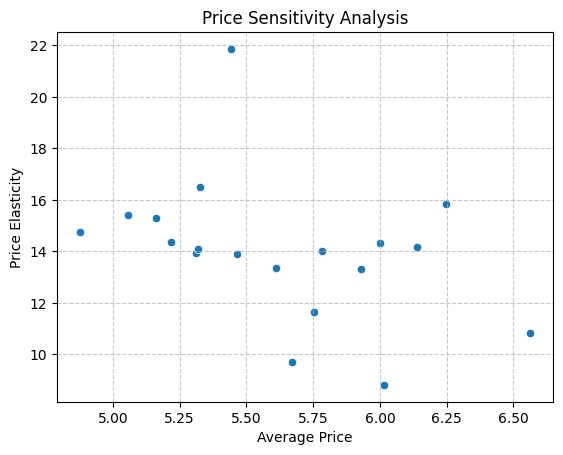

Price sensitivity analysis completed.


In [11]:
# 2.4 Price Sensitivity Analysis
print("Performing price sensitivity analysis...")
price_sensitivity = data.groupby("Itemname").agg({"Price": "mean", "Quantity": "sum"}).reset_index()
price_sensitivity['Elasticity'] = price_sensitivity['Quantity'] / price_sensitivity['Price']
sns.scatterplot(data=price_sensitivity, x="Price", y="Elasticity")
plt.title("Price Sensitivity Analysis")
plt.xlabel("Average Price")
plt.ylabel("Price Elasticity")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
print("Price sensitivity analysis completed.")

Performing RFM analysis for spend-based segmentation...
   CustomerID  Frequency  MonetaryValue
0       10504          1           2.04
1       10588          1          27.50
2       10826          1           5.67
3       11113          1          26.52
4       11267          1           8.87
Updated RFM data with Spending Segments:
   CustomerID  Frequency  MonetaryValue Spending_Segment
0       10504          1           2.04              Low
1       10588          1          27.50             High
2       10826          1           5.67              Low
3       11113          1          26.52             High
4       11267          1           8.87           Medium


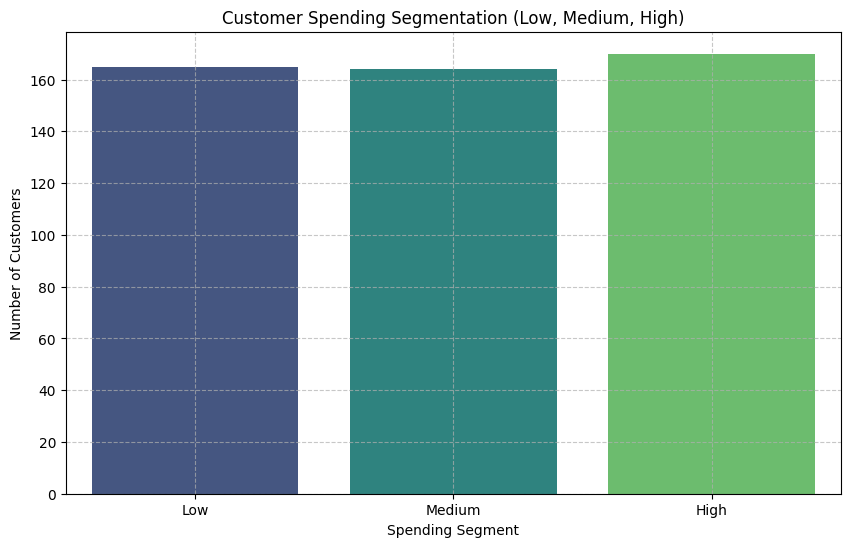

Number of customers in each spending segment:
Spending_Segment
High      170
Low       165
Medium    164
Name: count, dtype: int64


In [12]:
# 3.1 Spend-Based Segmentation
print("Performing RFM analysis for spend-based segmentation...")

# Grouping by CustomerID to calculate Frequency (number of transactions) and Monetary Value (total spending)
rfm_data = data.groupby("CustomerID").agg({
    'BillNo': 'nunique',  # Count number of unique BillNo's per customer
    'TotalPrice': 'sum'   # Sum total spending per customer
}).reset_index()

# Renaming columns to more descriptive names
rfm_data.rename(columns={"BillNo": "Frequency", "TotalPrice": "MonetaryValue"}, inplace=True)

# Show the first few rows to verify the data
print(rfm_data.head())

# For better insight, you can segment customers into high, medium, and low spenders
# For example, using quantiles to segment based on Monetary Value

# Calculate quantiles for segmentation
quantiles = rfm_data['MonetaryValue'].quantile([0.33, 0.66]).to_dict()

# Assign segments based on quantiles
rfm_data['Spending_Segment'] = pd.cut(rfm_data['MonetaryValue'],
                                       bins=[-np.inf, quantiles[0.33], quantiles[0.66], np.inf],
                                       labels=['Low', 'Medium', 'High'])

# Check for any NaN values in the 'Spending_Segment' column and handle them
nan_count = rfm_data['Spending_Segment'].isna().sum()
if nan_count > 0:
    print(f"Found {nan_count} NaN values in Spending_Segment. Assigning them to the 'Medium' segment.")
    rfm_data['Spending_Segment'].fillna('Medium', inplace=True)

# Print the updated data with segments
print("Updated RFM data with Spending Segments:")
print(rfm_data.head())



plt.figure(figsize=(10, 6))
sns.countplot(x='Spending_Segment', data=rfm_data, hue='Spending_Segment', palette="viridis", legend=False)
plt.title('Customer Spending Segmentation (Low, Medium, High)')
plt.xlabel('Spending Segment')
plt.ylabel('Number of Customers')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Optionally, print the number of customers in each spending segment
print("Number of customers in each spending segment:")
print(rfm_data['Spending_Segment'].value_counts())

In [13]:
# 3.2 Frequency-Based Segmentation
# Integrated in the RFM analysis (Frequency column)

Calculating item diversity per customer...


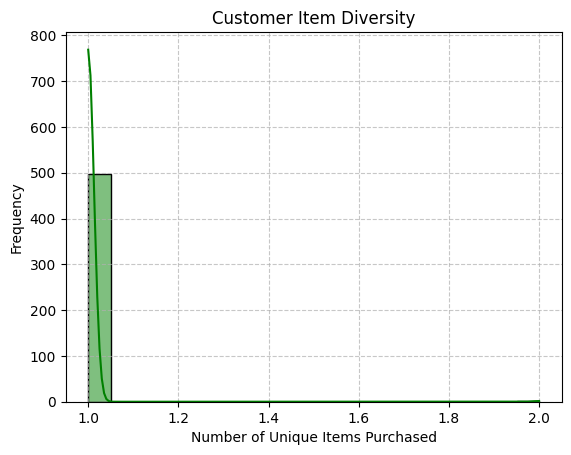

Item diversity segmentation completed.


In [14]:
# 3.3 Item Diversity Segmentation
print("Calculating item diversity per customer...")
item_diversity = data.groupby("CustomerID")['Itemname'].nunique().reset_index()
item_diversity.rename(columns={"Itemname": "UniqueItems"}, inplace=True)
sns.histplot(item_diversity['UniqueItems'], bins=20, kde=True, color="green")
plt.title("Customer Item Diversity")
plt.xlabel("Number of Unique Items Purchased")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
print("Item diversity segmentation completed.")

Performing customer segmentation using KMeans clustering...


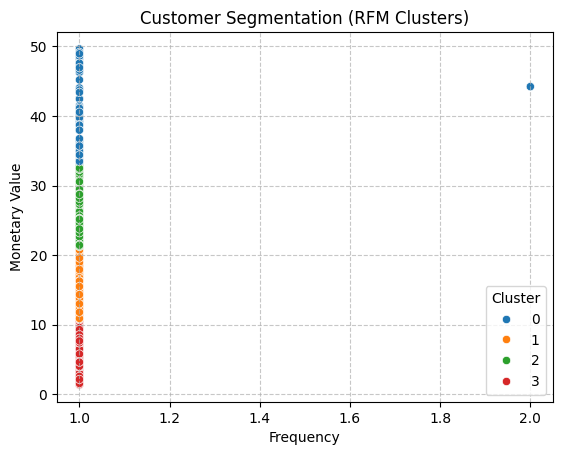

In [15]:
# Clustering for RFM segmentation
print("Performing customer segmentation using KMeans clustering...")
kmeans = KMeans(n_clusters=4, random_state=0)
rfm_data['Cluster'] = kmeans.fit_predict(rfm_data[['Frequency', 'MonetaryValue']])
sns.scatterplot(data=rfm_data, x='Frequency', y='MonetaryValue', hue='Cluster', palette='tab10')
plt.title("Customer Segmentation (RFM Clusters)")
plt.xlabel("Frequency")
plt.ylabel("Monetary Value")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [16]:
# 4.1 Prepare Data for Frequent Pattern Analysis
# Group items by BillNo and create a list of items for each bill
basket = data.groupby('BillNo')['Itemname'].apply(list).reset_index()

# 4.2 Encode items as binary variables using one-hot encoding
basket_encoded = basket['Itemname'].str.join('|').str.get_dummies('|').astype(bool)  # Ensure data is boolean
print("Basket encoding complete.")

# 4.3 Apply Apriori Algorithm
frequent_itemsets = apriori(basket_encoded, min_support=0.05, use_colnames=True)
print("Frequent itemsets generated.")

# 4.4 Generate Association Rules
# Manually set num_itemsets (e.g., to the length of frequent_itemsets)
num_itemsets = len(frequent_itemsets)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1, num_itemsets=num_itemsets)
print("Association rules generated.")

# 4.5 Display the Association Rules
print("\n\t===== Top 10 Association Rules =====")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))

# Improved explanation with better formatting
print("""
Antecedents: These are the items that are considered as the starting point or "if" part of the association rule.

Consequents: These are the items that tend to be purchased along with the antecedents or the "then" part of the association rule.

Support: Support measures how frequently a particular combination of items (both antecedents and consequents) appears in the dataset.
It is essentially the proportion of transactions in which the items are bought together.

Confidence: Confidence quantifies the likelihood of the consequent item being purchased when the antecedent item is already in the basket.
In other words, it shows the probability of buying the consequent item when the antecedent item is bought.

Lift: Lift measures the degree of association between the antecedent and consequent items, while considering the baseline purchase probability of the consequent item.
A lift value greater than 1 indicates a positive association, meaning that the items are more likely to be bought together than independently.
A value less than 1 indicates a negative association.
""")

Basket encoding complete.
Frequent itemsets generated.
Association rules generated.

	===== Top 10 Association Rules =====
  antecedents consequents   support  confidence      lift
0     (Sugar)    (Apples)  0.058824    0.346154  2.118462
1    (Apples)     (Sugar)  0.058824    0.360000  2.118462
2    (Yogurt)    (Apples)  0.052288    0.307692  1.883077
3    (Apples)    (Yogurt)  0.052288    0.320000  1.883077
4    (Butter)   (Bananas)  0.058824    0.360000  1.488649
5   (Bananas)    (Butter)  0.058824    0.243243  1.488649
6    (Cereal)   (Bananas)  0.058824    0.290323  1.200523
7   (Bananas)    (Cereal)  0.058824    0.243243  1.200523
8   (Bananas)    (Cheese)  0.052288    0.216216  1.181467
9    (Cheese)   (Bananas)  0.052288    0.285714  1.181467

Antecedents: These are the items that are considered as the starting point or "if" part of the association rule.

Consequents: These are the items that tend to be purchased along with the antecedents or the "then" part of the association 